In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm, tqdm_notebook
from glob import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load Data

In [2]:
# Show the directory structure
root_dir = "/kaggle/input/BBC News Summary/News Articles"

# Show the folders inside the root
print(os.listdir(root_dir))

['politics', 'sport', 'tech', 'entertainment', 'business']


In [3]:
# List which has the unique category names
unique_category = os.listdir(root_dir)

# List to store the category names
news_category_list = []

# List to store the news articles
news_article_list = []

news_summaries_list = []

# Iterate through unique category
for category in tqdm(unique_category, colour='yellow'):
    # Get the absolute path of that category directory
    abs_category_path = root_dir + "/" + category
    abs_summary_path = "/kaggle/input/BBC News Summary/Summaries" + "/" + category
    
    # Create a query to get the absolute path of all the .txt files
    query = abs_category_path + "/*.txt"
    summary_query = abs_summary_path + "/*.txt"
    #print(query)
    
    # Get the list of absolute path of all the files
    file_paths = glob(query)
    summary_paths = glob(summary_query)
    
    # Iterate through all the .txt files path
    for file_path in file_paths:

        # Open the file
        f = open(file_path, 'r', encoding='latin-1')
        # Read the file contents
        news_article = f.read()
        # Close the file
        f.close()

            
        news_article_list.append(news_article)
        news_category_list.append(category)
            
    for summary_path in summary_paths:
        # Open the file
        f = open(summary_path, 'r', encoding='utf-8')
        # Read the file contents
        news_summary = f.read()
        # Close the file
        f.close()

            
        # Append new articles and category to respective list
        news_summaries_list.append(news_summary)
        
# Print length of news articles and categories
print("Total Articles: ", len(news_article_list))
print("Total Summaries: ", len(news_summaries_list))
print("Total Categories: ", len(news_category_list), end='\n\n')

# Print a sample article
print("Sample Article: ")
print(news_article_list[0])

100%|██████████| 5/5 [00:32<00:00,  6.58s/it]

Total Articles:  2225
Total Summaries:  2225
Total Categories:  2225

Sample Article: 
Budget to set scene for election

Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.

Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.

- Increase in the stamp duty threshold from Â£60,000 
 - A freeze on petrol duty 
 - An extension of tax credit scheme for poorer families 
 - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main partie

In [4]:
# Dictionary to create a dataframe
df_dict = {"news": news_article_list, "summaries":news_summaries_list, "labels": news_category_list}

# Convert to dataframe
df = pd.DataFrame(df_dict)

# Remove the 'n' from the news
def remove_ns(text):
    return text.replace("\n", " ")

# Apply this to the data frame
df['news'] = df['news'].astype(str)
df['summaries'] = df['summaries'].astype(str)
for i in range(df.shape[0]):
    df.news[i] = df.news[i].replace("\n", " ")

# Show the dataframe
df.head()


# Save the df into system
df.to_csv('/kaggle/working/origin_dataframe.csv', index=False)

In [5]:
df = pd.read_csv('/kaggle/working/origin_dataframe.csv')
df.head()
#df.summaries[3]
#df.shape

,news,summaries,labels
0,Budget to set scene for election Gordon Brown...,- Increase in the stamp duty threshold from £6...,politics
1,Army chiefs in regiments decision Military ch...,"""They are very much not for the good and will ...",politics
2,Howard denies split over ID cards Michael How...,Michael Howard has denied his shadow cabinet w...,politics
3,Observers to monitor UK election Ministers wi...,The report said individual registration should...,politics
4,Kilroy names election seat target Ex-chat sho...,"UKIP's leader, Roger Knapman, has said he is g...",politics


# Data Analysis

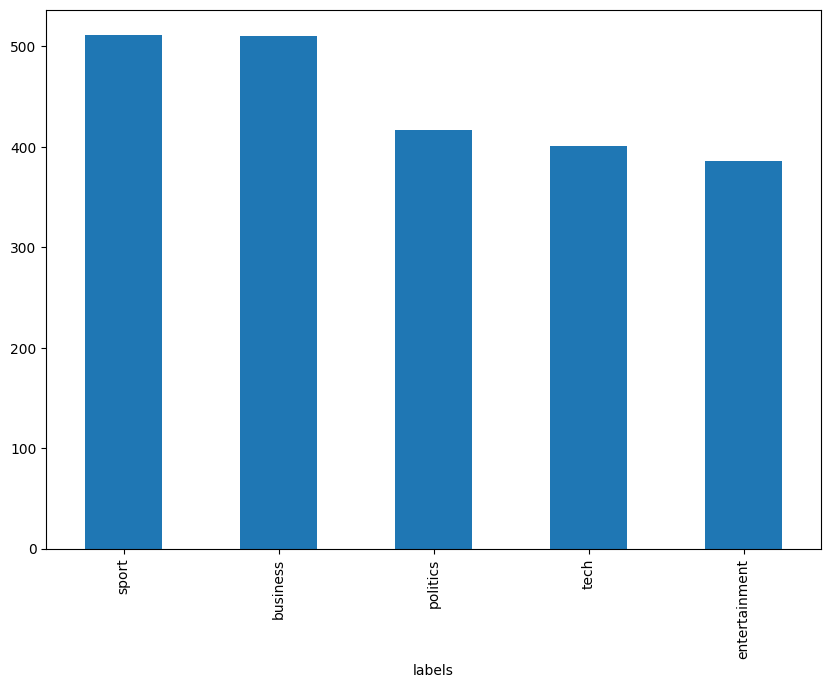

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize  # 需要安装nltk库
ax = df['labels'].value_counts().plot(kind='bar', figsize=(10,7))

#for p in ax.patches:
#    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


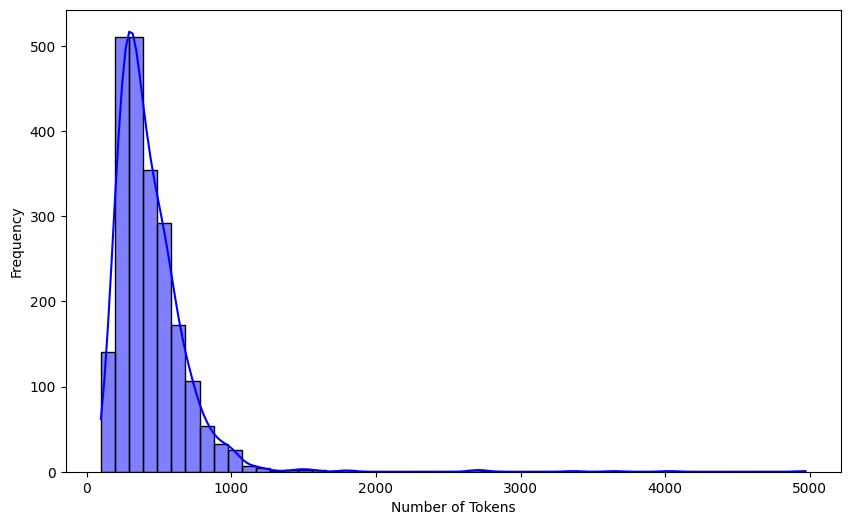

In [8]:
# Compute the token number for every news
token_counts = [len(word_tokenize(text)) for text in df.news]

# plot
plt.figure(figsize=(10, 6))
sns.histplot(token_counts, bins=50, kde=True, color='blue')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


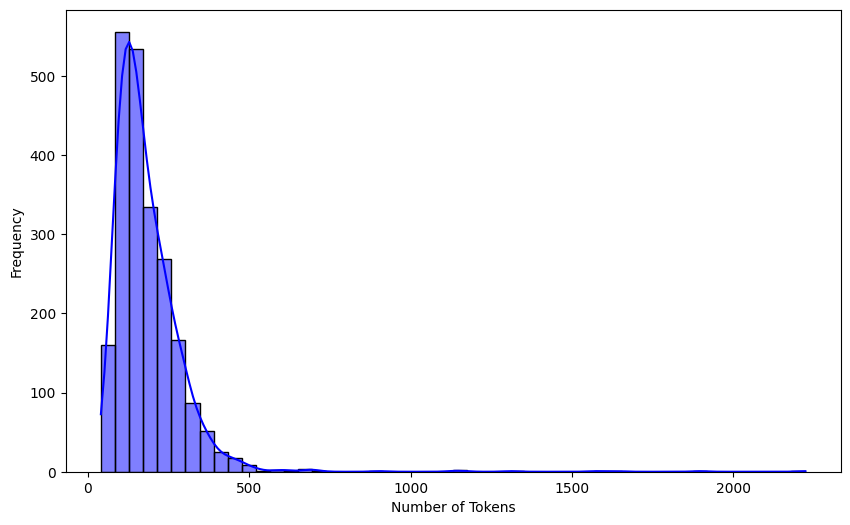

In [9]:
token_counts_summary = [len(word_tokenize(text_sum)) for text_sum in df.summaries]

plt.figure(figsize=(10, 6))
sns.histplot(token_counts_summary, bins=50, kde=True, color='blue')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

As can be seen from the above figure, there is little difference in the proportion of news in each category, with the largest number being the Sport category and the smallest number being the Entertainment category.
The length of news is mostly concentrated between 200-500, and a few are longer than 1000. The length of news abstracts is mostly concentrated between 86-215.

In order to obtain accurate input and output length parameters, we assume that the distribution satisfies the normal distribution and use Maxmize Likelihood to calculate the mean and variance of their lengths, and the parameter adjustment range is the 95% interval on both sides (rounded up).

We need to control the output parameters, because when the model generates longer summaries, or uses full text, the ROUGE score is bound to be higher, but this loses the role of the summary.

# Model Selection

Given that the large model was likely pre-trained on our dataset, we chose to use a smaller language model.

In [8]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

#configuration = BartConfig()
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

inputs = tokenizer("I loved reading the Hunger Games!")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
max_input_length = 700
max_target_length = 300

def preprocess_function(examples):

    model_inputs = tokenizer(
        examples["news"], max_length=max_input_length, padding="max_length",
        truncation=True
    )
    # Set up the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["summaries"], max_length=max_target_length, padding="max_length",
            truncation=True
        )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [10]:
from datasets import Dataset
hf_data=Dataset.from_pandas(df)

In [11]:
tokenized_datasets = hf_data.map(preprocess_function, batched=False)

  0%|          | 0/2225 [00:00<?, ?ex/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3860: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [12]:
tokenized_datasets

Dataset({
    features: ['news', 'summaries', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 2225
})

# Summarize

Task A: For data sets in specific fields (such as news), can fine-tuning a pre-trained model improve the summary accuracy?

Task B: We want to explore whether the improvement after fine-tuning only a few news types can improve the summary effect of other news types.

The design of Task B is divided into two groups: Group A uses category-balanced data for training, and Group B only uses several types of data for training. The sample sizes for Group A and Group B should be equal.

It can also be divided into ABC test. There are five categories in total, fine tune every 4 categories, and then test the summary accuracy on the remaining categories.

The data size is small and suitable for LoRA.

In [14]:
#inputs = tokenizer(df.news[3], return_tensors="pt", max_length=1024, truncation=True)
#print(input)
prompt = f"""
Summarize the following conversation.

{df.news[3]}

"""
inputs = tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True)

summary_ids = model.generate(
    inputs['input_ids'], 
    min_length= 100,
    max_length=256, 
    num_beams=4, # beam数量
    length_penalty=0.1, 
    early_stopping=True, 
    no_repeat_ngram_size=2  # This parameter can help reduce repetition
)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [15]:
print(summary)

The government says it expects to repeat its previous practice of inviting observers to any UK election, after a report called for changes to the electoral registration system in the wake of last year's general election in 2001, MPs have said, in response to criticism from the Labour peer Lord Greaves of the Liberal Democrats' call for international observers at the polls in England and Northern Ireland last week, the BBC understands. The move comes amid claims the election could be marred by electoral fraud.


In [17]:
#df.news[1]
df.summaries[3]

'The report said individual registration should be treated carefully as 12% of voters disappeared from the electoral roll in Northern Ireland when it was introduced in 2002.ODPM committee chairman Andrew Bennett said individual voter registration, as opposed to registration by household, should be quickly introduced as it could "dramatically reduce the chances of fraud"."It is vital that we move ahead with the Northern Ireland system of individual electoral registration to safeguard the integrity of the Britain\'s electoral system," he said.A report by two MPs committees called on Thursday for urgent changes to the electoral registration system to combat vote rigging and boost turnout.Figures for the 2001 general election suggest 29% of people aged between 18 and 24, and 19% of black voters were not on the electoral roll.The report said the government should consider fines for unregistered voters, but accepted many experts said it would be an expensive system that would be hard to enfo

# TASK A


## Split the data

In [13]:
from datasets.dataset_dict import DatasetDict

#hf_data
b_data=tokenized_datasets.train_test_split(test_size=0.1, shuffle = True)
test_valid = b_data['test'].train_test_split(test_size=0.5)
#print(b_data)
#print(test_valid)
train_test_val_data = DatasetDict({
    'train': b_data['train'],
    'test': test_valid['test'],
    'validation': test_valid['train']})

print(train_test_val_data)

DatasetDict({
    train: Dataset({
        features: ['news', 'summaries', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 2002
    })
    test: Dataset({
        features: ['news', 'summaries', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 112
    })
    validation: Dataset({
        features: ['news', 'summaries', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 111
    })
})


In [14]:
tokenized_datasets = train_test_val_data.remove_columns(['news', 'summaries'])
print(f"Shapes of the datasets:")
print(f"Training: {tokenized_datasets['train'].shape}")
print(f"Validation: {tokenized_datasets['validation'].shape}")
print(f"Test: {tokenized_datasets['test'].shape}")

print(tokenized_datasets)

Shapes of the datasets:
Training: (2002, 3)
Validation: (111, 3)
Test: (112, 3)
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 2002
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 112
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 111
    })
})


## Fine-tune the model

In [15]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
from datasets import load_dataset
import time
import torch.optim as optim
#import evaluate

In [20]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(model))

trainable model parameters: 3538944
all model parameters: 251116800
percentage of trainable model parameters: 1.41%


## Setup the PEFT/LoRA model for Fine-Tuning

In [21]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32, # Rank
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM # FLAN-T5
)

#Add LoRA adapter layers/parameters to the original LLM to be trained.
peft_model = get_peft_model(model, 
                            lora_config)
print(print_number_of_trainable_model_parameters(peft_model))

trainable model parameters: 3538944
all model parameters: 251116800
percentage of trainable model parameters: 1.41%


## Train PEFT Adapter

In [22]:
output_dir = f'/kaggle/working/peft-dialogue-summary-training-{str(int(time.time()))}'

peft_training_args = TrainingArguments(
    output_dir=output_dir,
    auto_find_batch_size=True,
    learning_rate=1e-3, # Higher learning rate than full fine-tuning.
    num_train_epochs=5,
    save_steps=10000,
    logging_steps=100
)

peft_trainer = Trainer(
    model=peft_model,
    args=peft_training_args,
    train_dataset=tokenized_datasets["train"],
)

In [52]:
from safetensors.torch import load_model, save_model
peft_trainer.train()

peft_model_path="/kaggle/working/peft-dialogue-summary-checkpoint-local"

peft_trainer.model.save_pretrained(peft_model_path)
tokenizer.save_pretrained(peft_model_path)

Step,Training Loss
100,0.190000
200,0.231600
300,0.198000
400,0.206700
500,0.195700
600,0.190500
700,0.181000
800,0.204300
900,0.181500
1000,0.186700


('/kaggle/working/peft-dialogue-summary-checkpoint-local/tokenizer_config.json',
 '/kaggle/working/peft-dialogue-summary-checkpoint-local/special_tokens_map.json',
 '/kaggle/working/peft-dialogue-summary-checkpoint-local/spiece.model',
 '/kaggle/working/peft-dialogue-summary-checkpoint-local/added_tokens.json')

In [53]:
from peft import PeftModel, PeftConfig

model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

peft_model = PeftModel.from_pretrained(model, 
                                       '/kaggle/working/peft-dialogue-summary-checkpoint-local', 
                                       torch_dtype=torch.bfloat16,
                                       is_trainable=True)

peft_model_base = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [54]:
print(print_number_of_trainable_model_parameters(peft_model))
print(print_number_of_trainable_model_parameters(peft_model_base))

trainable model parameters: 3538944
all model parameters: 251116800
percentage of trainable model parameters: 1.41%
trainable model parameters: 247577856
all model parameters: 247577856
percentage of trainable model parameters: 100.00%


# Evaluate the model qualitatively

## Evaluate the Model Quantitatively (with ROUGE Metric)

In [55]:
human_baseline_summaries = train_test_val_data['validation']['summaries']

#original_model_summaries = []
peft_model_summaries = []

for i in range(len(human_baseline_summaries)):
    news = torch.tensor([tokenized_datasets["validation"]["input_ids"][i],tokenized_datasets["validation"]["attention_mask"][i]])
#     original_model_outputs = peft_model_base.generate(input_ids=news,
#                                                       generation_config=GenerationConfig(max_new_tokens=200,
#                                                                                          #min_length=100,
#                                                                                          num_beams=1))
#     original_model_text_output = tokenizer.decode(original_model_outputs[0],
#                                                   skip_special_tokens=True)

    peft_model_outputs = peft_model.generate(input_ids=news,
                                             generation_config=GenerationConfig(max_new_tokens=200,
                                                                                #min_length=100,
                                                                                num_beams=1))
    peft_model_text_output = tokenizer.decode(peft_model_outputs[0],
                                              skip_special_tokens=True)
    
#     original_model_summaries.append(original_model_text_output)
    peft_model_summaries.append(peft_model_text_output)

In [56]:
import evaluate

rouge = evaluate.load('rouge')

# original_model_results = rouge.compute(
#     predictions=original_model_summaries,
#     references=human_baseline_summaries[0:len(original_model_summaries)],
#     use_aggregator=True,
#     use_stemmer=True,
# )

peft_model_results = rouge.compute(
    predictions=peft_model_summaries,
    references=human_baseline_summaries[0:len(peft_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

# print('ORIGINAL MODEL:')
# print(original_model_results)
print('PEFT MODEL:')
print(peft_model_results)

PEFT MODEL:
{'rouge1': 0.6451631447731907, 'rouge2': 0.5420538434157327, 'rougeL': 0.4783631626843009, 'rougeLsum': 0.47988333926043425}


In [57]:
from bert_score import BERTScorer

# Instantiate the BERTScorer object for English language
scorer = BERTScorer(lang="en")

# Calculate BERTScore for the summary 1 against the excerpt
# P1, R1, F1_1 represent Precision, Recall, and F1 Score respectively
#P1, R1, F1_1 = scorer.score(original_model_summaries, human_baseline_summaries[0:len(original_model_summaries)])

# Calculate BERTScore for summary 2 against the excerpt
# P2, R2, F2_2 represent Precision, Recall, and F1 Score respectively
P2, R2, F2_2 = scorer.score(peft_model_summaries, human_baseline_summaries[0:len(peft_model_summaries)])

#print("Original Model Summaries F1 Score:", F1_1.tolist()[0])
print("PEFT Model Summaries F1 Score:", F2_2.tolist()[0])

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PEFT Model Summaries F1 Score: 0.8844162821769714


## Evaluate on the test set

### ROUGE

In [58]:
human_baseline_summaries = train_test_val_data['test']['summaries']

original_model_summaries = []
peft_model_summaries = []

for i in range(len(human_baseline_summaries)):
    news = torch.tensor([tokenized_datasets["test"]["input_ids"][i],tokenized_datasets["test"]["attention_mask"][i]])
    original_model_outputs = peft_model_base.generate(input_ids=news,
                                                      generation_config=GenerationConfig(max_new_tokens=200,
                                                                                         #min_length=100,
                                                                                         num_beams=1))
    original_model_text_output = tokenizer.decode(original_model_outputs[0],
                                                  skip_special_tokens=True)

    peft_model_outputs = peft_model.generate(input_ids=news,
                                             generation_config=GenerationConfig(max_new_tokens=200,
                                                                                #min_length=100,
                                                                                num_beams=1))
    peft_model_text_output = tokenizer.decode(peft_model_outputs[0],
                                              skip_special_tokens=True)
    
    original_model_summaries.append(original_model_text_output)
    peft_model_summaries.append(peft_model_text_output)

In [61]:
import evaluate

rouge = evaluate.load('rouge')

original_model_results = rouge.compute(
    predictions=original_model_summaries,
    references=human_baseline_summaries[0:len(original_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

peft_model_results = rouge.compute(
    predictions=peft_model_summaries,
    references=human_baseline_summaries[0:len(peft_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

print('ORIGINAL MODEL:')
print(original_model_results)
print('PEFT MODEL:')
print(peft_model_results)

ORIGINAL MODEL:
{'rouge1': 0.23885694937661328, 'rouge2': 0.18064701681867784, 'rougeL': 0.20497590218246114, 'rougeLsum': 0.20643878370388655}
PEFT MODEL:
{'rouge1': 0.6915477723094884, 'rouge2': 0.6028127661501806, 'rougeL': 0.5284109899847461, 'rougeLsum': 0.528416879133051}


### BERTScore

In [62]:
from bert_score import BERTScorer

# Instantiate the BERTScorer object for English language
scorer = BERTScorer(lang="en")

# Calculate BERTScore for the summary 1 against the excerpt
# P1, R1, F1_1 represent Precision, Recall, and F1 Score respectively
P1, R1, F1_1 = scorer.score(original_model_summaries, human_baseline_summaries[0:len(original_model_summaries)])

# Calculate BERTScore for summary 2 against the excerpt
# P2, R2, F2_2 represent Precision, Recall, and F1 Score respectively
P2, R2, F2_2 = scorer.score(peft_model_summaries, human_baseline_summaries[0:len(original_model_summaries)])

print("Original Model Summaries F1 Score:", F1_1.tolist()[0])
print("PEFT Model Summaries F1 Score:", F2_2.tolist()[0])

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Original Model Summaries F1 Score: 0.8921818733215332
PEFT Model Summaries F1 Score: 0.9422442317008972


## Visualization

In [124]:
sports_human_sum=train_test_val_data['test']["labels"=="sports"]["summaries"]
sports_original_sum=original_model_summaries
sports_peft_sum=peft_model_summaries
print(len(train_test_val_data['test']["labels"=="sports"]))
print(len(sports_original_sum))

5
112


In [126]:
train_test_val_data['test']


['"Graham Henry (former Wales coach) said a couple of years ago that we should \'be bold\' when going to France, and he was proved right," said Ruddock.They also have a good record at the Stade de France, having won their first two games there, in 1999 and 2001."Against Wales, which is different from the teams we have beaten, I hope we can show our proper game."Wales have made two changes from the team that thrashed Italy 38-8 in Rome.Despite their stuttering displays in their first two games defending champions France are also unbeaten.G Thomas (capt); K Morgan, T Shanklin, G Henson, S Williams; S Jones, D Peel; G Jenkins, M Davies, A Jones; B Cockbain, R Sidoli; R Jones, M Williams, M Owen.R McBryde, J Yapp, J Thomas, R Sowden-Taylor, G Cooper, C Sweeney, R Williams.Wales coach Mike Ruddock is determined that his team will not go into their shells after their promising start to the championship.',
 'Mr Blair said the statement was a "fair summary" of Lord Goldsmith\'s opinion.On Thur